# <center>Объявления о продаже автомобилей в Германии<center>

Вам представлен датасет с объявлениями о продаже в Германии на 2022 год. Необходимо осмотреть первично данные и выполнить их предобработку, также сделать соответствующие выводы по полученной информации

### Обзор данных

* `mileage` — Пройденное расстояние на автомобиле
* `make` — Марка автомобиля
* `model` — Модель автомобиля
* `fuel` — Тип топлива
* `gear` — Тип коробки передач
* `offerType` — Тип предложения, то есть «Новые», «Демонстрационные» машины и т.д.
* `price` — Цена продажи автомобиля в объявлении (в долларах)
* `hp` — Количество лошадиных сил
* `year` — Год производства автомобиля

Импортируйте необходимые библиотеки

In [66]:
import pandas as pd
import numpy as np

### Загрузка данных

1. Загрузите необходимый датасет в переменную

In [67]:
cars_df = pd.read_csv('germany_cars.csv')

correct_cars_df = cars_df.copy() # Создал копию для работы с DataFrame
correct_cars_df

,mileage,make,model,fuel,gear,offerType,price,hp,year
0,235000,BMW,316,Diesel,Manual,Used,6800.0,116.0,2011
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877.0,122.0,2011
2,149300,SEAT,Exeo,Gasoline,Manual,Used,6900.0,160.0,2011
3,96200,Renault,Megane,Gasoline,Manual,Used,6950.0,110.0,2011
4,156000,Peugeot,308,Gasoline,Manual,Used,6950.0,156.0,2011
...,...,...,...,...,...,...,...,...,...
46400,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990.0,71.0,2021
46401,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990.0,71.0,2021
46402,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990.0,71.0,2021
46403,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990.0,71.0,2021


2. Проведите первичный осмотр данных при помощи известных вам методов(дополнительно можно использовать метод hist() для оценки распределений). Сделайте соответствующие выводы на основе полученной информации

(46405, 9)

417645

Index(['mileage', 'make', 'model', 'fuel', 'gear', 'offerType', 'price', 'hp',
       'year'],
      dtype='object')

RangeIndex(start=0, stop=46405, step=1)

16565.45

            mileage         price            hp          year
count  4.640500e+04  4.487200e+04  46376.000000  46405.000000
mean   7.117786e+04  1.656545e+04    132.990987   2016.012951
std    6.262531e+04  1.936315e+04     75.449284      3.155214
min    0.000000e+00  1.100000e+03      1.000000   2011.000000
25%    1.980000e+04  7.490000e+03     86.000000   2013.000000
50%    6.000000e+04  1.099900e+04    116.000000   2016.000000
75%    1.050000e+05  1.949000e+04    150.000000   2019.000000
max    1.111111e+06  1.199900e+06    850.000000   2021.000000


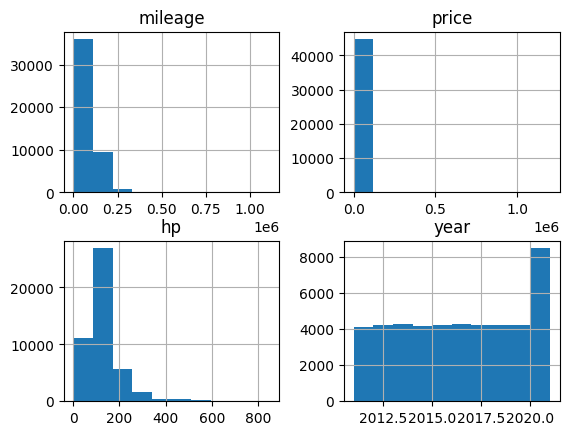

In [68]:
shape = correct_cars_df.shape                                           # Размерность нашего DataFrame 46405
size = correct_cars_df.size                                             # Количество элементов
columns = correct_cars_df.columns                                       # Названия колонок
string = correct_cars_df.index                                          # Значение индексов во строкам
hist = correct_cars_df.hist(column=['mileage', 'price', 'hp', 'year'])  # Гистограммы числовых колонок
mean_price_germany = round(correct_cars_df['price'].mean(), 2)          # Средняя цена автомобиля в Германии
all_stat = correct_cars_df.describe()                                   # Общая статистика

print(shape, size, columns, string, mean_price_germany, all_stat, sep='\n\n')


3. Переименуйте столбец `offerType` под стандартное название

In [69]:
correct_cars_df = correct_cars_df.rename(columns={'offerType': 'offertype'})


### Работа с дубликатами данных

4. Необходимо вывести на экран количество дублированных строк в данных, если таковые имеются, а также избавиться от них. Не забудьте сбросить индекс в датафрейме при необходимости.

In [70]:

correct_cars_df = correct_cars_df.drop_duplicates()


### Работа с пропусками

5. Выведите на экран количество пропусков в каждом столбце, опишите их, почему они могут возникнуть и как их возможно исправить

In [71]:

sir = correct_cars_df.isna().sum()
str_nan = sir[sir > 0]

print(str_nan)

# Причины: машина продана, машины нет в наличие, отсутствие данных
# Заполнить пропуски дефолтным значением

model     137
fuel      247
gear      175
price    1520
hp         24
dtype: int64


6. Заполните пропуски в `model`,`fuel`,`gear`

In [72]:
correct_cars_df[['model', 'fuel', 'gear']] = correct_cars_df[['model', 'fuel', 'gear']].fillna('Нет данных')


7. Удалите оставшиеся пропуски в столбцах `hp` и `price`.

In [73]:
correct_cars_df['price'] = correct_cars_df['price'].fillna(correct_cars_df['price'].mean())
correct_cars_df['hp'] = correct_cars_df['hp'].fillna(correct_cars_df['hp'].median())


Проверьте, все ли пропуски точно удалились из датафрейма

In [74]:
correct_cars_df.isna().sum()

mileage      0
make         0
model        0
fuel         0
gear         0
offertype    0
price        0
hp           0
year         0
dtype: int64

8. Оцените количество уникальных марок автомобилей (производителей) с помощью метода unique() и выведите их количество числом (пожалуйста, не считайте вручную)

In [75]:
count = correct_cars_df['make'].unique().size

print(f'Кол-во уникальных марок: {count}')

Кол-во уникальных марок: 77


9. Выведите топ 20 марок автомобилей (производителей) по количеству объявлений с помощью метода value_counts()

In [76]:
count_make = correct_cars_df['make'].value_counts().head(20)
count_make

make
Volkswagen       6725
Opel             4616
Ford             4290
Skoda            2755
Renault          2704
Audi             2559
BMW              2373
Mercedes-Benz    2281
SEAT             1834
Hyundai          1758
Fiat             1504
Peugeot          1182
Toyota           1149
Kia               968
smart             937
Citroen           924
Volvo             778
Nissan            730
Mazda             699
Dacia             666
Name: count, dtype: int64

### Группировка данных

10. Сгруппируйте данные по столбцу `make`, выведите для каждого производителя среднюю стоимость их автомобиля, а также среднее число лошадиных сил и отсортируйте по убыванию столбца `price`. Отобразите только топ 20 самых дорогих производителей. Напишите вывод, всё ли в порядке с полученными данными или Вас что-то смущает

In [77]:
# Вариант  один
group_make = correct_cars_df.groupby(by='make').agg(price_mean=('price','mean'), hp_mean=('hp', 'mean'))
print(*group_make['price_mean'].sort_values(ascending=False).head(20).index, sep='\n')

# Вариант  два
group_make = group_make.nlargest(20, 'price_mean')
group_make

# Меня ничего не смущаяет , хочу Maserati

Maybach
Ferrari
Lamborghini
McLaren
Bentley
Aston
Rolls-Royce
Corvette
Porsche
FISKER
Maserati
Alpina
Polestar
Morgan
Tesla
Alpine
Land
RAM
Cadillac
Dodge


,price_mean,hp_mean
make,,
Maybach,450479.333333,543.000000
Ferrari,324028.181818,693.909091
Lamborghini,305698.777778,690.111111
McLaren,194661.892801,646.636364
Bentley,168712.309441,554.866667
Aston,163442.960000,536.200000
Rolls-Royce,135446.940270,605.000000
Corvette,110160.000000,687.000000
Porsche,87962.465193,412.383621


11. Создайте новый столбец из `make` и `model` и выведите топ 10 самый дорогих и дешевых автомобилей с помощью средней стоимости

In [86]:
correct_cars_df['make_model'] = correct_cars_df['make'].str.cat(correct_cars_df['model'], sep='-')
price_df = correct_cars_df.groupby(by='make_model').agg(price_mean=('price', 'mean')).sort_values('price_mean', ascending=False)
price_df['price_mean'] = round(price_df['price_mean'])


display(price_df.head(10))
display(price_df.tail(10))

,price_mean
make_model,
Ferrari-F12,1199900.0
Mercedes-Benz-S 650,717078.0
Maybach-Pullman,608439.0
Ferrari-812,439900.0
Aston-Martin,398000.0
Lamborghini-Aventador,371423.0
McLaren-675LT,297900.0
Ferrari-F8 Tributo,294417.0
Bentley-Flying Spur,251560.0


,price_mean
make_model,
Suzuki-Alto,3596.0
Daihatsu-Cuore,3495.0
Fiat-Linea,3400.0
Volkswagen-Fox,3011.0
Hyundai-Getz,2800.0
Trailer-Anhänger-Нет данных,2750.0
Volvo-Нет данных,2499.0
Others-Landwind,1850.0
Brilliance-BS4,1500.0


12. Сделайте общий вывод о проделанной работе

# В Германии крутые машины 